---
# Predictive Small Business Loan Default Analysis Model
---

**Author**: Dhevina Tailor

**Contact**: [dhevinatailor@gmail.com](mailto:dhevinatailor@gmail.com)

**Date**: October 20, 2023

## Table of Contents
---
1. [Introduction: Exploratory Data Analysis](#introduction)
2. [Loading and Setup](#loadingandsetup)
2. [Assessment](#assessment)
3. [Exploratory Data Analysis (EDA)](#eda)
4. [Findings Summary](#findings)
5. [Saving the Data](#saving)

## Introduction: Exploratory Data Analysis (EDA) <a class="anchor" id="introduction"></a>

With our data now cleaned and prepared, we can delve into the analysis phase. A preliminary Exploratory Data Analysis (EDA) is conducted to begin to describe relationships between variables, and start formulating hypotheses for further analysis.

**Understanding Our Clients:**
We aim to uncover the characteristics of the clients seeking loans. To do this, we will categorize our data into two main groups: categorical and numeric. This structured approach will help us gain valuable insights into the clients and their loan-seeking behavior.

## Loading and Setup <a class="anchor" id="loadingandsetup"></a>

In [1]:
# importing required libraries
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sm
#from scipy import stats
#from scipy.stats import norm

### Get Data

In [2]:
# import data to new dataframe
df = pd.read_csv("Cleaned_Loan_Data.csv")

In [3]:
df.head()

,Name,City,State,Bank,BankState,NAICS,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,MIS_Status,SBA_Appv
0,ABC HOBBYCRAFT,EVANSVILLE,IN,FIFTH THIRD BANK,OH,451120,4,2.0,1,0,N,Paid,48000.0
1,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,1ST SOURCE BANK,IN,722410,2,2.0,1,0,N,Paid,32000.0
2,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,GRANT COUNTY STATE BANK,IN,621210,7,1.0,1,0,N,Paid,215250.0
3,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,1ST NATL BK & TR CO OF BROKEN,OK,0,2,1.0,1,0,N,Paid,28000.0
4,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,FLORIDA BUS. DEVEL CORP,FL,0,14,1.0,1,0,N,Paid,229000.0


In [4]:
df.duplicated().sum()

0

In [5]:
# Create a dictionary to store column names and descriptions
column_descriptions = {
    'LoanNr_ChkDgt': 'Identifier Primary key',
    'Name': 'Borrower name',
    'City': 'Borrower city',
    'State': 'Borrower state',
    'Zip': 'Borrower zip code',
    'Bank': 'Bank name',
    'BankState': 'Bank state',
    'NAICS': 'North American industry classification system code',
    'ApprovalDate': 'Date SBA commitment issued',
    'ApprovalFY': 'Fiscal year of commitment',
    'Term': 'Loan term in months',
    'NoEmp': 'Number of business employees',
    'NewExist': '1 = Existing business, 2 = New business',
    'CreateJob': 'Number of jobs created',
    'RetainedJob': 'Number of jobs retained',
    'FranchiseCode': 'Franchise code, (00000 or 00001) = No franchise',
    'UrbanRural': '1 = Urban, 2 = rural, 0 = undefined',
    'RevLineCr': 'Revolving line of credit: Y = Yes, N = No',
    'LowDoc': 'LowDoc Loan Program: Y = Yes, N = No',
    'ChgOffDate': 'The date when a loan is declared to be in default',
    'DisbursementDate': 'Disbursement date',
    'DisbursementGross': 'Amount disbursed',
    'BalanceGross': 'Gross amount outstanding',
    'MIS_Status': 'Loan status charged off = CHGOFF, Paid in full = PIF',
    'ChgOffPrinGr': 'Charged-off amount',
    'GrAppv': 'Gross amount of loan approved by the bank',
    'SBA_Appv': "SBA’s guaranteed amount of the approved loan"
}

# Function to retrieve the description of a column
def get_column_description(column_name):
    return column_descriptions.get(column_name, 'Description not available for this column.')

## Assessment <a class="anchor" id="assessment"></a>

In [6]:
df.shape

(835240, 13)

In [7]:
print(f'We have {df.shape[0]} rows and {df.shape[1]} columns in our dataset')

We have 835240 rows and 13 columns in our dataset


Next, we inspect the first rows of data to get a feel for the structure.

In [8]:
df.head()

,Name,City,State,Bank,BankState,NAICS,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,MIS_Status,SBA_Appv
0,ABC HOBBYCRAFT,EVANSVILLE,IN,FIFTH THIRD BANK,OH,451120,4,2.0,1,0,N,Paid,48000.0
1,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,1ST SOURCE BANK,IN,722410,2,2.0,1,0,N,Paid,32000.0
2,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,GRANT COUNTY STATE BANK,IN,621210,7,1.0,1,0,N,Paid,215250.0
3,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,1ST NATL BK & TR CO OF BROKEN,OK,0,2,1.0,1,0,N,Paid,28000.0
4,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,FLORIDA BUS. DEVEL CORP,FL,0,14,1.0,1,0,N,Paid,229000.0


Next, we inspect the different datatypes of the dataset.

In [9]:
# Display the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835240 entries, 0 to 835239
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Name           835240 non-null  object 
 1   City           835240 non-null  object 
 2   State          835240 non-null  object 
 3   Bank           835240 non-null  object 
 4   BankState      835240 non-null  object 
 5   NAICS          835240 non-null  int64  
 6   NoEmp          835240 non-null  int64  
 7   NewExist       835240 non-null  float64
 8   FranchiseCode  835240 non-null  int64  
 9   UrbanRural     835240 non-null  int64  
 10  RevLineCr      835240 non-null  object 
 11  MIS_Status     835240 non-null  object 
 12  SBA_Appv       835240 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 82.8+ MB


The provided information is a summary of a pandas DataFrame with 836,136 entries (rows) and 13 columns. The DataFrame has undergone some data preprocessing or filtering, and the output represents the current state of the DataFrame after these operations.

1. **Filtering and Data Preprocessing**: The initial DataFrame had 899,164 entries, but some rows have been removed during data cleaning steps. As a result, the DataFrame now contains 836,136 entries.

2. **Columns and Data Types**: The DataFrame contains 13 columns in total, with 6 columns having a numerical data type (float64, int64) and 7 columns having an object data type. The numerical columns represent continuous or discrete numeric features, while the object columns may contain categorical or string-based data.

In [10]:
# Get a statistical summary of the dataset
df.describe()

,NAICS,NoEmp,NewExist,FranchiseCode,UrbanRural,SBA_Appv
count,835240.000000,835240.000000,835240.000000,835240.000000,835240.000000,8.352400e+05
mean,396825.970340,11.353995,1.271363,674.869317,0.757009,1.472824e+05
std,261062.353651,73.135326,0.444663,5992.496965,0.647802,2.230775e+05
min,0.000000,0.000000,1.000000,0.000000,0.000000,5.000000e+02
25%,235310.000000,2.000000,1.000000,1.000000,0.000000,2.108000e+04
50%,445310.000000,4.000000,1.000000,1.000000,1.000000,6.000000e+04
75%,561730.000000,10.000000,2.000000,1.000000,1.000000,1.750000e+05
max,928120.000000,9999.000000,2.000000,92006.000000,2.000000,4.500000e+06


#### Applicability of `df.describe()`

The `df.describe()` method, which provides summary statistics, applies to the following column:

- **NoEmp**: This column contains numerical data, making it suitable for generating statistics like mean, standard deviation, and quartiles.

For the following columns, `df.describe()` is not applicable:

- **Zip**: Zip codes are categorical and not suitable for summary statistics.
- **NAICS**: NAICS codes represent industry categories and are not suitable for numerical statistics.
- **NewExist**: This column contains categorical values (1 and 2) and doesn't provide meaningful numerical statistics.
- **FranchiseCode**: Franchise codes are categorical and not suitable for numerical statistics.
- **UrbanRural**: This column contains categorical values (0, 1, and 2) and doesn't provide meaningful numerical statistics.


## Exploratory Data Analysis (EDA) <a class="anchor" id="eda"></a>

### Univariate Analysis - Categorical

Let's look at the variable of interest, 'MIS_Status':

In [11]:
df.head()

,Name,City,State,Bank,BankState,NAICS,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,MIS_Status,SBA_Appv
0,ABC HOBBYCRAFT,EVANSVILLE,IN,FIFTH THIRD BANK,OH,451120,4,2.0,1,0,N,Paid,48000.0
1,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,1ST SOURCE BANK,IN,722410,2,2.0,1,0,N,Paid,32000.0
2,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,GRANT COUNTY STATE BANK,IN,621210,7,1.0,1,0,N,Paid,215250.0
3,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,1ST NATL BK & TR CO OF BROKEN,OK,0,2,1.0,1,0,N,Paid,28000.0
4,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,FLORIDA BUS. DEVEL CORP,FL,0,14,1.0,1,0,N,Paid,229000.0


Let's prints the unique values present in the 'loan_status' column, which represents the different loan statuses in the dataset:

In [12]:
# Check the unique values in the 'MIS_Status' column.
print(df['MIS_Status'].unique())

['Paid' 'Default']


The following calculates the count of each unique value in the 'MIS_Status' column, giving us the number of loans in each loan status category:

In [13]:
# Get the count of each unique value in 'MIS_Status' column
df['MIS_Status'].value_counts()

MIS_Status
Paid       690494
Default    144746
Name: count, dtype: int64

In [14]:
# Check the distribution of the loan status "PIF" - Paid in Full vs. "CHGOFF" - Charged Off
df['MIS_Status'].value_counts()/df.shape[0]*100.0

MIS_Status
Paid       82.670131
Default    17.329869
Name: count, dtype: float64

We see above, there is about a 83/17 split in the loan status being Paid in Full and Charged Off.

Let's take a look at the client base overall.

We will split the data into categorical and numerical variables, and do some EDA for both types.

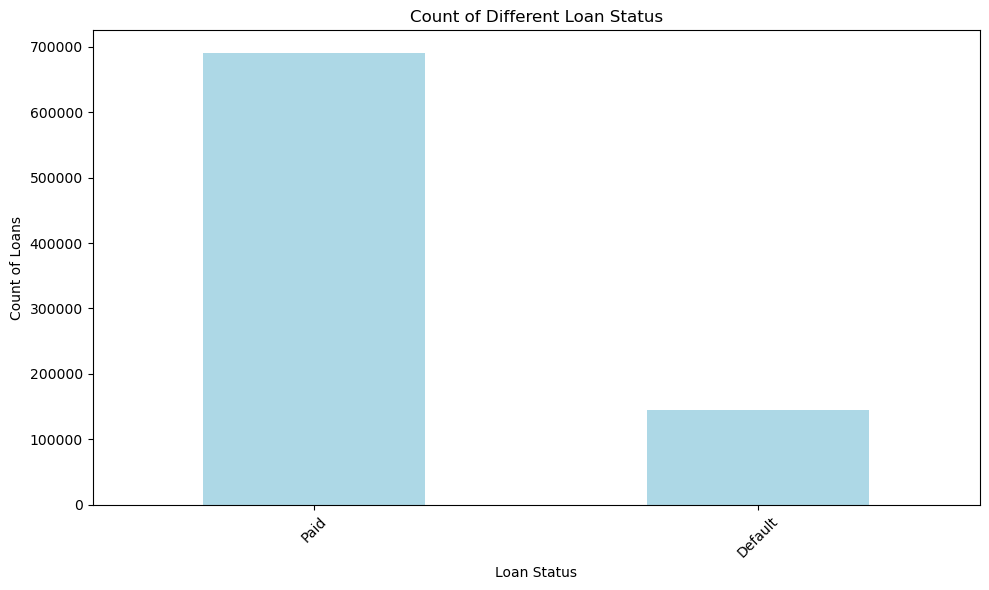

In [15]:
# Create a bar plot for the count of each unique value in 'MIS_Status' column
plt.figure(figsize=(10, 6))
df['MIS_Status'].value_counts().plot(kind='bar', color='lightblue')
plt.xlabel('Loan Status')
plt.ylabel('Count of Loans')
plt.title('Count of Different Loan Status')
plt.xticks(rotation=45)  
plt.tight_layout()  
plt.show()

The bar plot visually represents the distribution of loan statuses, showing the count of loans in each category. This plot provides an overview of the loan status distribution in the dataset.

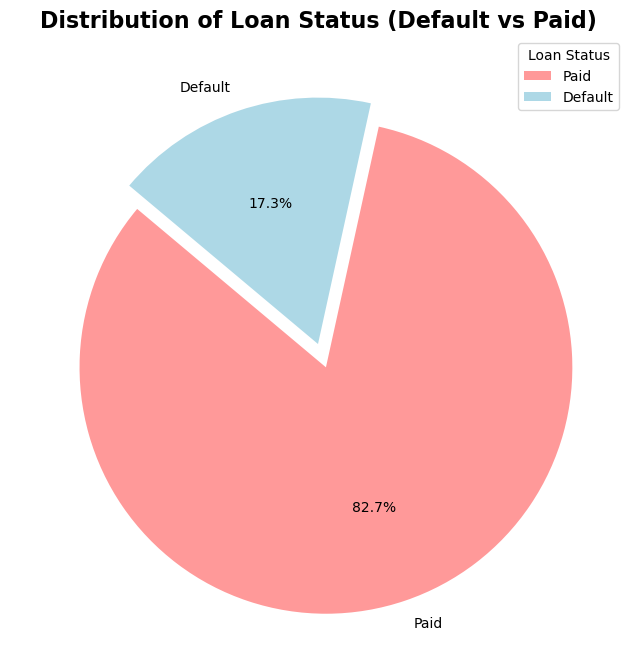

In [16]:
# Group the data by "MIS_Status" and count the occurrences
status_counts = df['MIS_Status'].value_counts()

# Define colors for the pie chart
colors = ['#ff9999', 'lightblue']

# Specify the 'Default' slice to explode
explode = (0.1, 0)

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)

# Add a legend
plt.legend(status_counts.index, title="Loan Status", loc="upper right")

# Set a title
plt.title("Distribution of Loan Status (Default vs Paid)", fontsize=16, fontweight="bold")

# Display the chart
plt.show()

Of the loans in the dataset, 82.7% are successfully paid, while 17.3% are classified as defaults.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835240 entries, 0 to 835239
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Name           835240 non-null  object 
 1   City           835240 non-null  object 
 2   State          835240 non-null  object 
 3   Bank           835240 non-null  object 
 4   BankState      835240 non-null  object 
 5   NAICS          835240 non-null  int64  
 6   NoEmp          835240 non-null  int64  
 7   NewExist       835240 non-null  float64
 8   FranchiseCode  835240 non-null  int64  
 9   UrbanRural     835240 non-null  int64  
 10  RevLineCr      835240 non-null  object 
 11  MIS_Status     835240 non-null  object 
 12  SBA_Appv       835240 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 82.8+ MB


In [18]:
# Make a new dataframe of only the categorical variables
categorical_df = df.select_dtypes('object').copy()

# Check
categorical_df.head()

,Name,City,State,Bank,BankState,RevLineCr,MIS_Status
0,ABC HOBBYCRAFT,EVANSVILLE,IN,FIFTH THIRD BANK,OH,N,Paid
1,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,1ST SOURCE BANK,IN,N,Paid
2,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,GRANT COUNTY STATE BANK,IN,N,Paid
3,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,1ST NATL BK & TR CO OF BROKEN,OK,N,Paid
4,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,FLORIDA BUS. DEVEL CORP,FL,N,Paid


### Univariate Analysis - Numeric variables

Let's repeat the process we did above with the numeric variables:

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 835240 entries, 0 to 835239
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Name           835240 non-null  object 
 1   City           835240 non-null  object 
 2   State          835240 non-null  object 
 3   Bank           835240 non-null  object 
 4   BankState      835240 non-null  object 
 5   NAICS          835240 non-null  int64  
 6   NoEmp          835240 non-null  int64  
 7   NewExist       835240 non-null  float64
 8   FranchiseCode  835240 non-null  int64  
 9   UrbanRural     835240 non-null  int64  
 10  RevLineCr      835240 non-null  object 
 11  MIS_Status     835240 non-null  object 
 12  SBA_Appv       835240 non-null  float64
dtypes: float64(2), int64(4), object(7)
memory usage: 82.8+ MB


In [20]:
# Get only the numeric columns
numeric_df = df.select_dtypes(['int64','float64']).copy()

numeric_df.head()

,NAICS,NoEmp,NewExist,FranchiseCode,UrbanRural,SBA_Appv
0,451120,4,2.0,1,0,48000.0
1,722410,2,2.0,1,0,32000.0
2,621210,7,1.0,1,0,215250.0
3,0,2,1.0,1,0,28000.0
4,0,14,1.0,1,0,229000.0


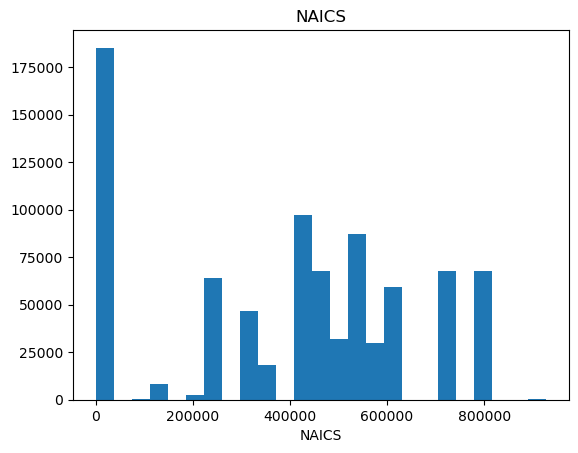

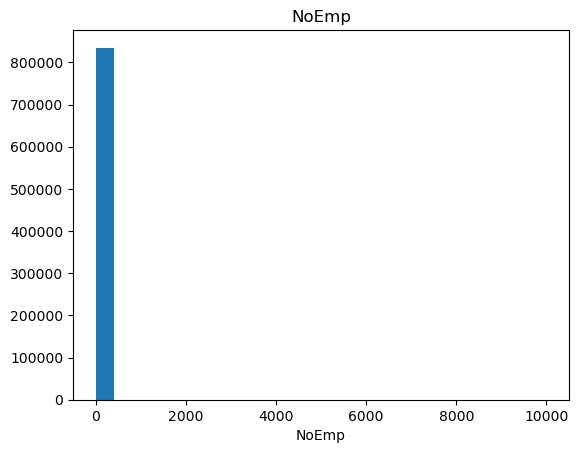

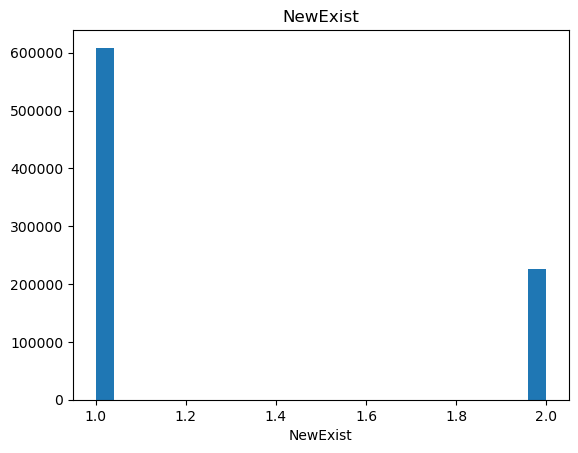

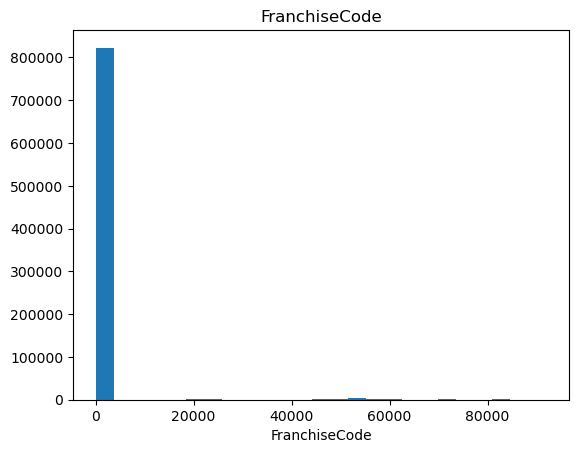

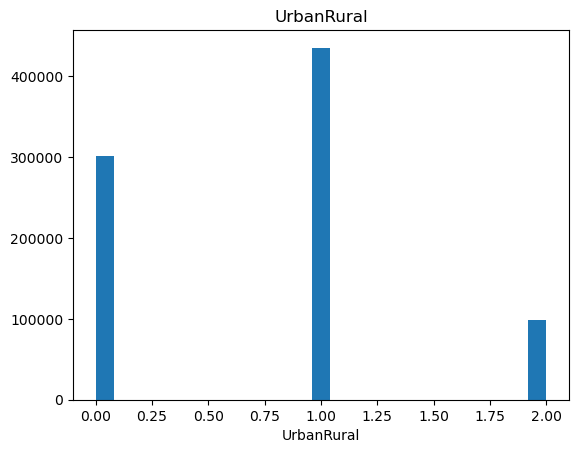

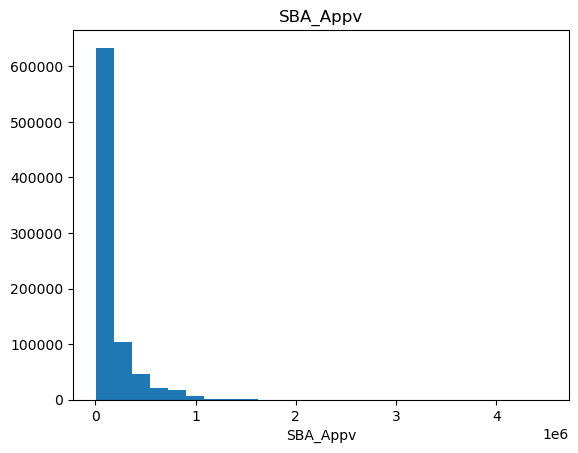

In [21]:
for column in numeric_df:
    plt.figure()
    plt.hist(df[column], bins=25)
    plt.title(column)
    plt.xlabel(column)
    plt.show()

#### Exploring Data with Histograms

The code iterates through each numeric column in the dataset and generates a histogram to visualize the distribution of values within each column. A histogram is a graphical representation of the frequency or count of values in a given range or bin. It's a valuable tool for understanding the underlying data distribution.

#### Interpretation of Histograms

1. **'NAICS' Histogram:** The 'NAICS' histogram illustrates the distribution of NAICS codes, which classify businesses by industry or sector. This histogram helps identify which industries are prevalent in the dataset, and you can look for patterns or concentrations in certain sectors.

2. **'NoEmp' Histogram:** The 'NoEmp' histogram reveals the distribution of the number of employees in the businesses. You can use this histogram to understand the typical size of businesses in the dataset, whether they are small, medium, or large.

3. **'NewExist' Histogram:** The 'NewExist' histogram shows whether businesses are categorized as new (1.0) or existing (2.0). This histogram can provide insights into the balance between new and established businesses in the dataset.

4. **'FranchiseCode' Histogram:** The 'FranchiseCode' histogram represents the distribution of franchise codes. You can identify whether there are specific franchise codes that dominate the dataset or if there is a wide distribution of franchise codes among the businesses.

5. **'UrbanRural' Histogram:** The 'UrbanRural' histogram displays the distribution of values indicating whether businesses are located in urban (1) or rural (0) areas. This histogram helps assess the urban-rural distribution of businesses in the dataset.

### Bivariate Analysis - Numeric Features
Now we will repeat the process for numeric variables.

In [22]:
numeric_df

,NAICS,NoEmp,NewExist,FranchiseCode,UrbanRural,SBA_Appv
0,451120,4,2.0,1,0,48000.0
1,722410,2,2.0,1,0,32000.0
2,621210,7,1.0,1,0,215250.0
3,0,2,1.0,1,0,28000.0
4,0,14,1.0,1,0,229000.0
...,...,...,...,...,...,...
835235,451120,6,1.0,1,0,56000.0
835236,451130,6,1.0,1,0,42500.0
835237,332321,26,1.0,1,0,225000.0
835238,0,6,1.0,1,0,60000.0


In [23]:
# We need the "MIS_Status" variable so we will add it back to our numeric dataframe
numeric_df['MIS_Status'] = df['MIS_Status']

# Check
numeric_df.head()

,NAICS,NoEmp,NewExist,FranchiseCode,UrbanRural,SBA_Appv,MIS_Status
0,451120,4,2.0,1,0,48000.0,Paid
1,722410,2,2.0,1,0,32000.0,Paid
2,621210,7,1.0,1,0,215250.0,Paid
3,0,2,1.0,1,0,28000.0,Paid
4,0,14,1.0,1,0,229000.0,Paid


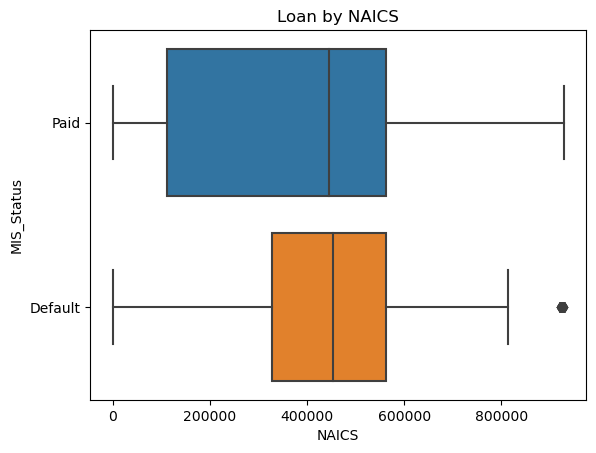

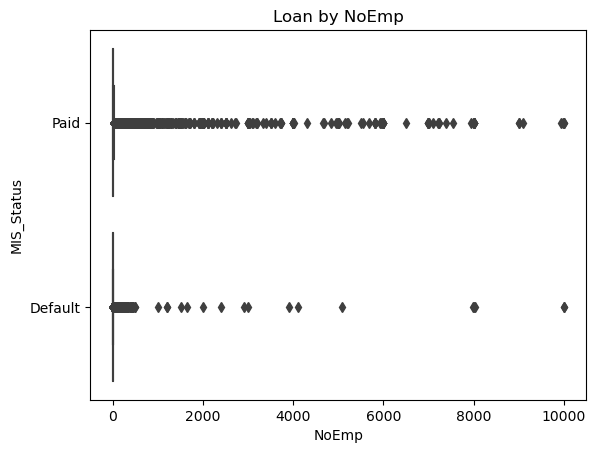

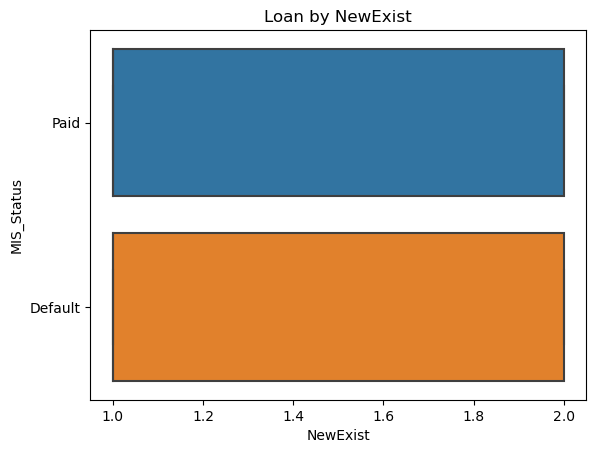

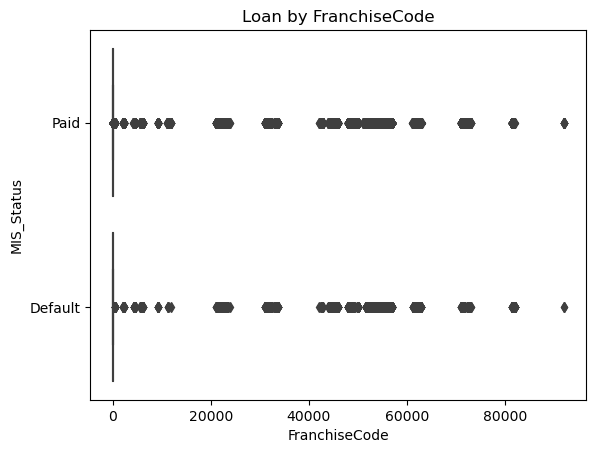

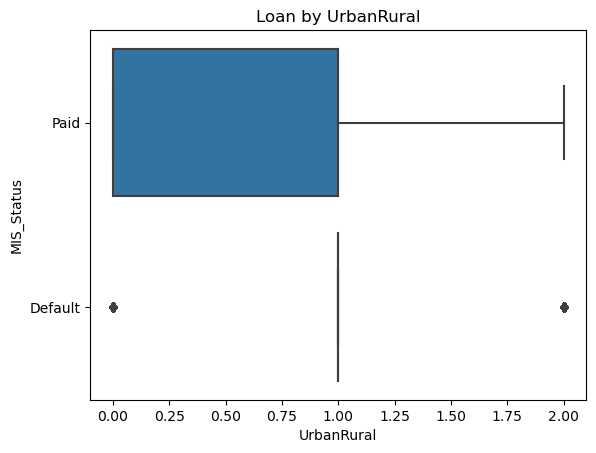

In [24]:
# Converting the MIS_Status column to string type so seaborn treats it as a category
for col in numeric_df.iloc[:, :-2]:

    # Normalize the histogram
    sns.boxplot(x=col, y='MIS_Status', data=df)
    plt.title(f'Loan by {col}')
    plt.show()

The boxplots provide key insights into how the distribution of numeric features varies in the context of loan outcomes. They illustrate how the 'MIS_Status' (categorized as 'Paid' or 'Default') relates to each numeric feature. These visualizations are valuable for understanding how numeric features may influence loan outcomes. Differences in feature distributions between 'Paid' and 'Default' loans can provide insights into factors that affect the likelihood of loan default. 

In [25]:
# Select only numeric columns for correlation analysis
numeric_columns = df.select_dtypes(include=['number'])

# Calculate the correlation matrix for the numeric columns
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
print(correlation_matrix)

                  NAICS     NoEmp  NewExist  FranchiseCode  UrbanRural  \
NAICS          1.000000 -0.039880  0.046764       0.006432    0.426574   
NoEmp         -0.039880  1.000000 -0.042049       0.001257   -0.043344   
NewExist       0.046764 -0.042049  1.000000       0.073025    0.034858   
FranchiseCode  0.006432  0.001257  0.073025       1.000000   -0.010331   
UrbanRural     0.426574 -0.043344  0.034858      -0.010331    1.000000   
SBA_Appv      -0.074650  0.097906 -0.074204       0.026744   -0.079400   

               SBA_Appv  
NAICS         -0.074650  
NoEmp          0.097906  
NewExist      -0.074204  
FranchiseCode  0.026744  
UrbanRural    -0.079400  
SBA_Appv       1.000000  


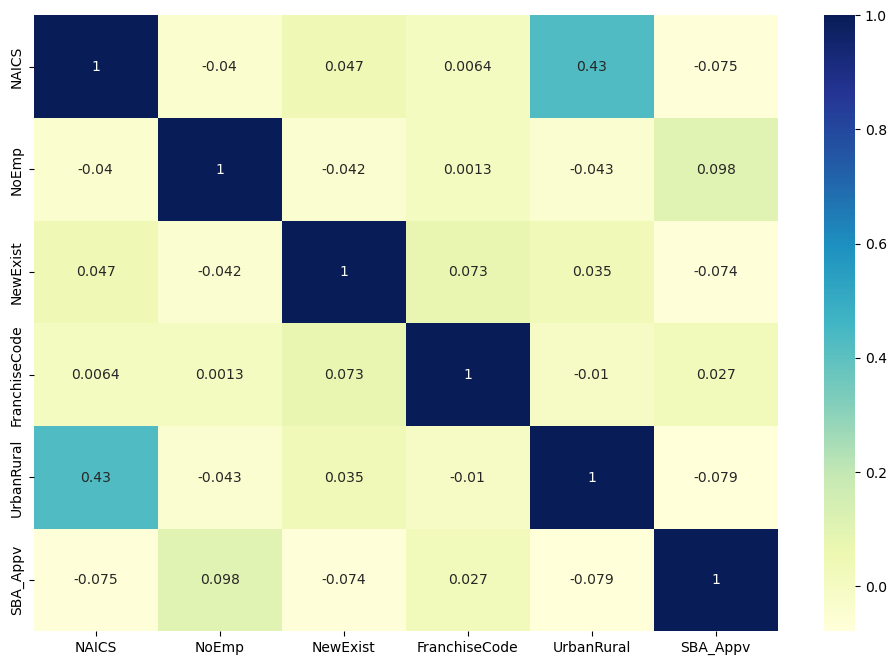

In [26]:
# Set the figure size
plt.figure(figsize=(12, 8))

# Create a heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu')

# Show the plot
plt.show()

**Correlation Comment:**

In the correlation matrix, we observe a moderate positive correlation of approximately 0.4 between two variables. This suggests that there is a noticeable, but not very strong, linear relationship between these variables. A correlation of 0.4 indicates that as one variable increases, the other tends to increase as well, but the relationship is not exceptionally strong. This finding is valuable for understanding the data but may not be indicative of a highly influential connection between these particular attributes.


<Axes: xlabel='NAICS', ylabel='UrbanRural'>

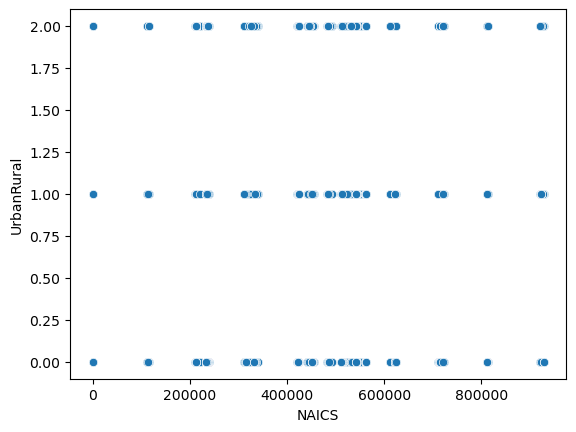

In [27]:
# Plottting a scatterplot between 'NAICS' and 'UrbanRural' columns
sns.scatterplot(x='NAICS', y='UrbanRural', data=df)

**Correlation Comment:**

It's important to note that the observed correlation between 'NAICS' and 'UrbanRural' is primarily a result of the identical values in these columns. Both 'NAICS' and 'UrbanRural' contain the same numerical values. This correlation is not indicative of a meaningful relationship. Therefore, any correlation found in this context is not interpretable as a genuine statistical relationship between the variables.

### Hypotheses for Further Analysis

Plan on building a logistic regression model because it's well-suited for predicting binary outcomes, such as loan default. Logistic regression provides probabilities and insights into the impact of variables.

### Columns for Consideration in Predicting Loan Approval

In the context of building a logistic regression model to predict loan approval (MIS_Status), it's crucial to consider which columns from the given dataset can serve as valuable predictors. Below is an analysis of each column and its potential relevance:

1. **City**: The city where the business is located (City) could be relevant for predicting loan approval, as urban and rural areas may have different economic conditions.

2. **State**: The state (State) can also be significant, considering that economic conditions and lending practices can vary widely across states.

3. **Bank**: The bank (Bank) could influence loan approval as different banks may have varying lending policies.

4. **BankState**: The state where the bank is located (BankState) is essential, as lending regulations and policies may differ by state.

5. **NAICS**: The NAICS code (NAICS) represents the business's industry or sector and can be a valuable categorical predictor.

6. **NoEmp**: The number of employees (NoEmp) in the business is relevant as smaller businesses might have different loan approval rates compared to larger ones.

7. **NewExist**: The NewExist column represents whether the business is new (1) or existing (2), which can impact loan approval.

8. **FranchiseCode**: The FranchiseCode is categorical, indicating whether the business is a franchise (1) or not (0), which can influence loan approval.

9. **UrbanRural**: The UrbanRural column specifies whether the business is in an urban (1) or rural (0) area, serving as a binary categorical predictor.

10. **RevLineCr**: The Revolving Line of Credit (RevLineCr) column is binary (Yes/No) and signifies whether the business has a revolving line of credit, making it highly relevant for predicting loan approval.

In [28]:
df.head()

,Name,City,State,Bank,BankState,NAICS,NoEmp,NewExist,FranchiseCode,UrbanRural,RevLineCr,MIS_Status,SBA_Appv
0,ABC HOBBYCRAFT,EVANSVILLE,IN,FIFTH THIRD BANK,OH,451120,4,2.0,1,0,N,Paid,48000.0
1,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,1ST SOURCE BANK,IN,722410,2,2.0,1,0,N,Paid,32000.0
2,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,GRANT COUNTY STATE BANK,IN,621210,7,1.0,1,0,N,Paid,215250.0
3,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,1ST NATL BK & TR CO OF BROKEN,OK,0,2,1.0,1,0,N,Paid,28000.0
4,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,FLORIDA BUS. DEVEL CORP,FL,0,14,1.0,1,0,N,Paid,229000.0


## Findings Summary  <a class="anchor" id="findings"></a>

From our initial analysis let's summarize what we have found out so far about the differences between clients who paid in full versus those who do not.

The exploratory data analysis of loan outcomes reveals that a significant majority of loans, approximately 82.7%, are successfully paid off. Conversely, approximately 17.3% of the loans are classified as defaults, reflecting the proportion of loans that did not meet their repayment obligations. These findings highlight the importance of understanding and monitoring loan default rates to make informed lending decisions and risk assessments.

We have found out that the top most loans defaulting are from the following borrowers states:
1. California
2. Texas
3. New York
4. Florida

## Saving the Data  <a class="anchor" id="saving"></a>

Now that we have spent the time exploring this dataset, we are going to save it for future use. We will be using our cleaned dataset to carry out some modeling work to learn more about the dataset!

In [29]:
# Save the data to a csv file for future use

df.to_csv('Explored_Loan_Data.csv', index=False)